# linear regression

In [9]:
# ignore non harmful warnings
from warnings import filterwarnings

filterwarnings("ignore")

In [10]:
# step 1 - data ingestion

In [11]:
import pandas as pd

df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
# problem statement - estimate the profit for startups

In [13]:
# step 2 - perform basic data qulify check

In [14]:
df.shape

(50, 5)

In [15]:
# missing value
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [16]:
# check the duplicate
df.duplicated().sum()

np.int64(0)

In [17]:
# step 3 - EDA (explotary data analysis)

In [18]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(50, 5)

In [19]:
# Step 3 - EDA (Exploratory Data Analysis)

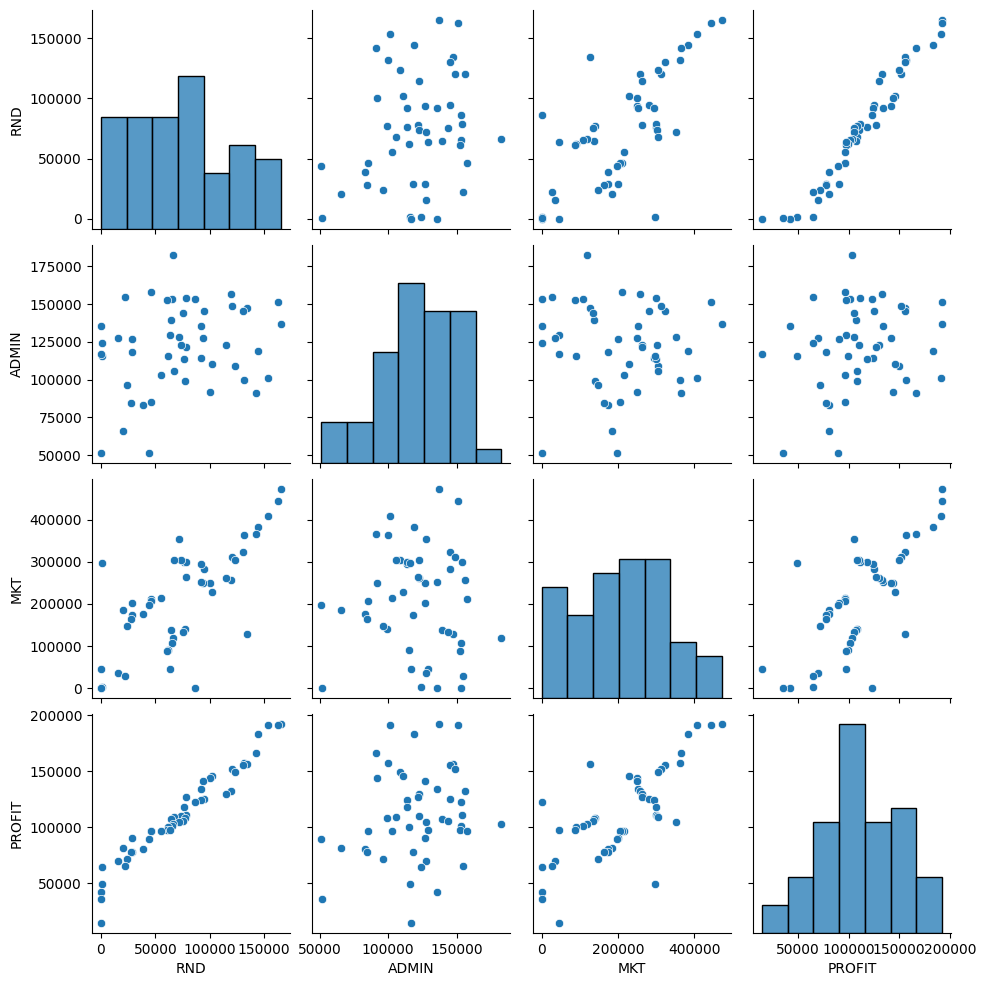

In [20]:
import seaborn as sns

sns.pairplot(data=df)

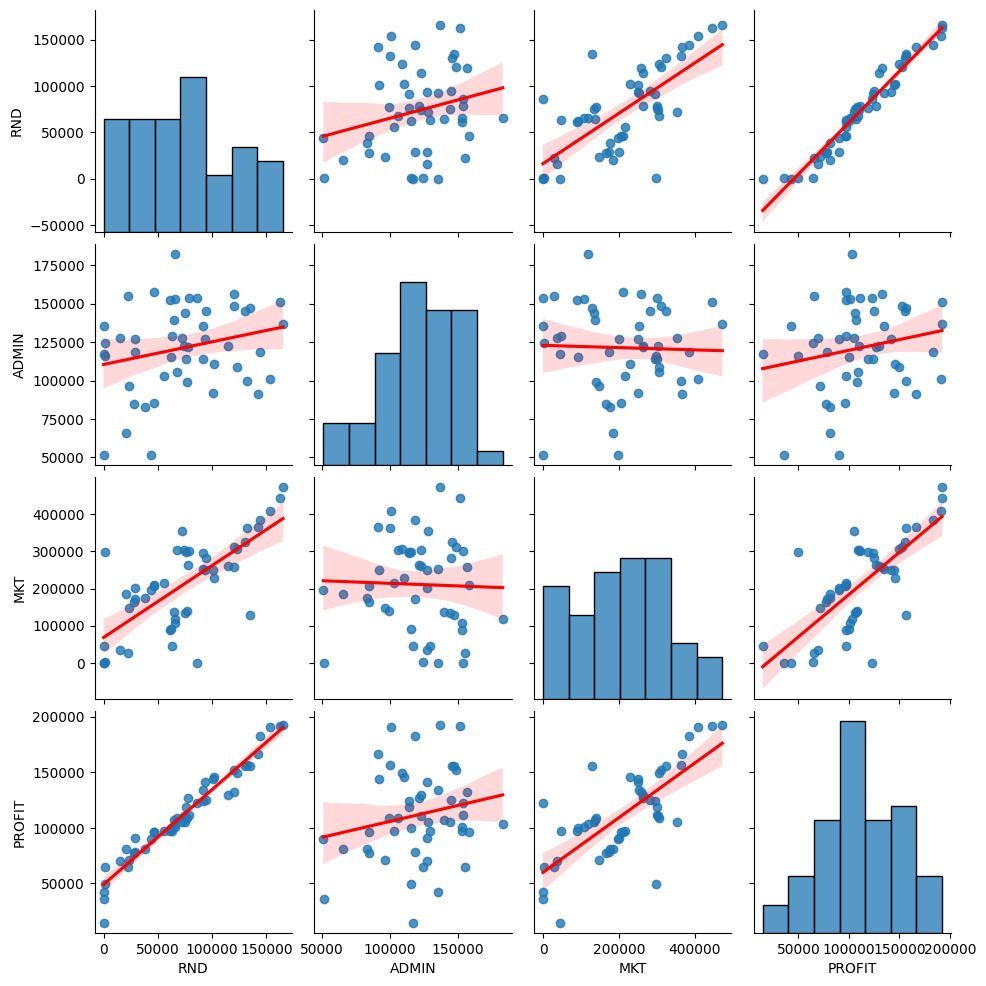

In [21]:
sns.pairplot(data=df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

In [22]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

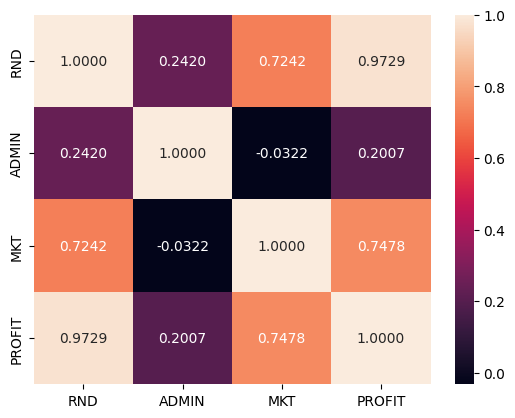

In [23]:
sns.heatmap(data=corr, annot=True, fmt=".4f")

In [24]:
# Simple Linear Regression (1 Target feature, 1 Predictor)

In [25]:
# seprate X and Y

In [26]:
X = df[["RND"]]
Y = df["PROFIT"]

In [27]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [28]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [30]:
model1.intercept_

np.float64(49032.89914125215)

In [31]:
model1.coef_

array([0.85429137])

In [32]:
# Profit_pred = 49032.90 + 0.8543 x RND

In [33]:
# R2 score on data
model1.score(X, Y)

0.9465353160804393

<Axes: xlabel='RND', ylabel='PROFIT'>

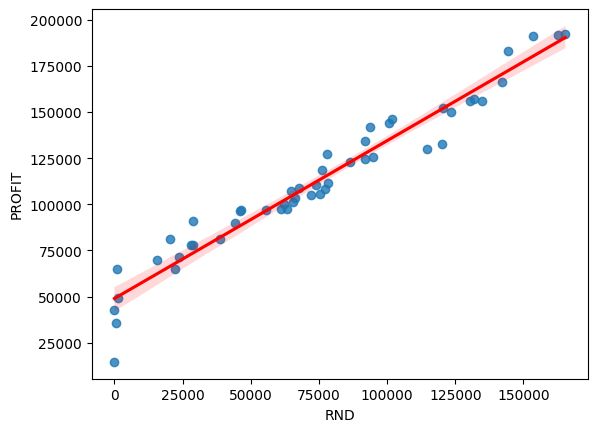

In [34]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

In [35]:
# Prediction given by straight line
preds = model1.predict(X)
preds[0:5]

array([190289.29389289, 187938.71118575, 180116.65707807, 172369.00320589,
       170433.97345032])

In [36]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [37]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def evaluate_model(model, x, y):
    # Predict results for x
    ypred = model.predict(x)
    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [38]:
evaluate_model(model1, X, Y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


In [39]:
# Above clearly shows that model is good and can be used for out of sample prediction

In [40]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [41]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [42]:
# estimating profit for any RND value
rnd = 2_50_000
profit_pred = model1.predict([[rnd]])
print(profit_pred)

[262605.74187595]


In [43]:
X.describe()

,RND
count,50.000000
mean,73721.615600
std,45902.256482
min,0.000000
25%,39936.370000
50%,73051.080000
75%,101602.800000
max,165349.200000


In [44]:
#   MULTIPLAYER LINEAR REGRESSION

In [45]:
# MULTIPLAYER PREDICTORS
X = df[["RND", "ADMIN", "MKT"]]
Y = df["PROFIT"]

In [46]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [47]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [48]:
model2 = LinearRegression()
model2.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
model2.intercept_

np.float64(50122.192989865274)

In [50]:
model2.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [51]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [52]:
coefs = pd.Series(model2.coef_, index=X.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

In [53]:
# Profit_pred = 50122.19 + 0.8057 x RND -0.0268x ADMIN +
#  0.0272xMKT

<Axes: >

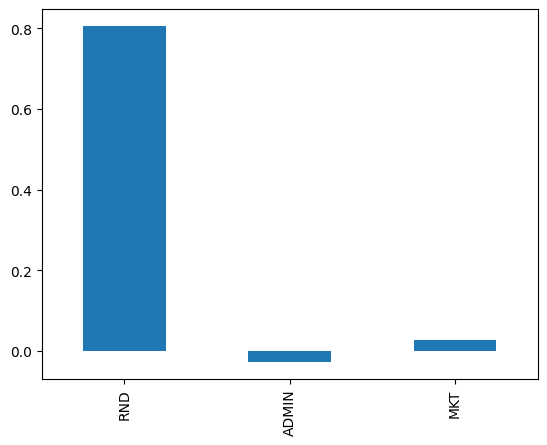

In [54]:
coefs.plot(kind="bar")

In [55]:
# Evaluatate the Multiple linear regression model2
evaluate_model(model2, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


In [56]:
# R2 score > 0.8 hence model is good and can
# be used for out of sample prediction

In [57]:
X.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [58]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [59]:
nd = 1_20_000
mkt = 30_000
admin = 50_000

profit_pred = model2.predict([[rnd, admin, mkt]])
print(profit_pred)

[251026.99899309]
